In [24]:
import wfdb
import math
from wfdb import processing
rmeans={'filename':'rmean'}
rstandard_deviation={'filename':'rstd'}
rinvalid=[]


def mean_std(file_path,file_name):
    
    file_destination=file_path+file_name
    sig, fields = wfdb.rdsamp(file_destination , channels=[0] ,sampto=40000 )
    xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
    xqrs.detect()
    
    # print(fields)
    # wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds] )

    #sqrs.qrs_inds is array containing indexes of qrs ?
    
    rpeaksum=0
    for i in xqrs.qrs_inds:
        rpeaksum+=sig[i]
    try:
        rmean=(rpeaksum/len(xqrs.qrs_inds))
        rmeans[file_name]=float(rmean)
        
        rstdsum=0
        for i in xqrs.qrs_inds:
            rstdsum+=(sig[i]-rmean)**2
        rstd=math.sqrt(rstdsum/len(xqrs.qrs_inds))
        # print("standard deviation is",rstd)
        rstandard_deviation[file_name]=float(rstd)
        
        
        
    except ZeroDivisionError:
        rinvalid.append(file_name)

        
    
    
    

def main():
    file_path=r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
    
    for i in range(1,36):
        file_name="\cu"+f"{i:02d}"
        mean_std(file_path,file_name)
    
    # print(rmeans)
    # print(rinvalid)
    # print(rstandard_deviation)
 
        
main()


Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Failed to find 8 beats during learning.
Initializing using default parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
Learning initial signal parameters...
Found 8 beats dur

Area??

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


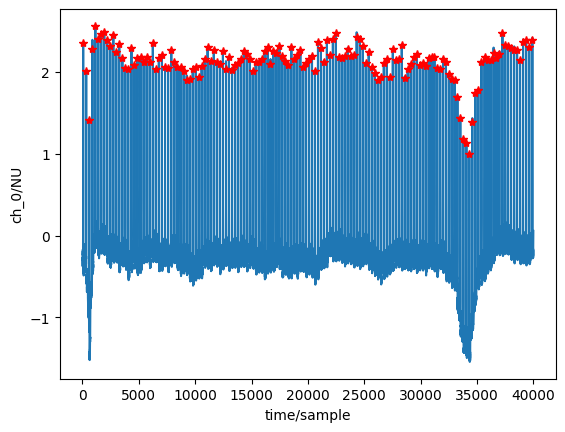

In [25]:
file_path=r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name="\cu01"
file_destination=file_path+file_name
sig, fields = wfdb.rdsamp(file_destination , channels=[0] ,sampto=40000 )
xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
xqrs.detect()
wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds] )

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '+']


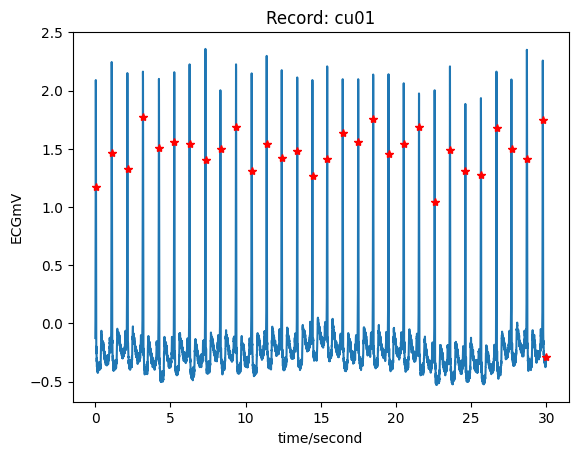

In [66]:
import wfdb
file_path=r"D:\vf predict\cu-ventricular-tachyarrhythmia-database-1.0.0"
file_name="\cu01"
file_destination=file_path+file_name
stop=53542
start=stop - 7500 # 7500 samples = 30 seconds
record = wfdb.rdrecord(file_destination , sampfrom=start , sampto=stop)
annotation = wfdb.rdann(file_destination, 'atr' , sampfrom=start , sampto=stop , shift_samps=True )
print(annotation.symbol)
wfdb.plot_wfdb(record=record,
               annotation=annotation,
               time_units='seconds')